### What Is Overfitting?
It is the case where model performance on the training dataset is improved at the cost of worse performance on data not seen during training, such as a holdout test dataset or new data.

An analysis of learning dynamics can help to identify whether a model has overfit the training dataset and may suggest an alternate configuration to use that could result in better predictive performance.

We can identify if a machine learning model has overfit by first evaluating the model on the training dataset and then evaluating the same model on a holdout test dataset.

if the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

But what does it mean if a model’s performance is “significantly better” on the training set compared to the test set?

### Example of Overfitting in Scikit-Learn
In this section, we will look at an example of overfitting a machine learning model to a training dataset.

First, let’s define a synthetic classification dataset.

We will use the [sklearn.datasets.make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to define a binary (two class) classification prediction problem with 10,000 examples (rows) and 20 input features (columns).

In [1]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


Next, we need to split the dataset into train and test subsets.

We will use the [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function and split the data into 70 percent for training a model and 30 percent for evaluating it.

In [2]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


Next, we can explore a machine learning model overfitting the training dataset.

We will use a decision tree via the [sklearn.tree.DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and test different tree depths with the “max_depth” argument.

We evaluate decision tree depths from 1 to 20.

In [3]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]

We will enumerate each tree depth, fit a tree with a given depth on the training dataset, then evaluate the tree on both the train and test sets.

The expectation is that as the depth of the tree increases, performance on train and test will improve to a point, and as the tree gets too deep, it will begin to overfit the training dataset at the expense of worse performance on the holdout test set.

In [6]:
# evaluate a decision tree for each depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []

for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.762, test: 0.766
>2, train: 0.809, test: 0.805
>3, train: 0.881, test: 0.875
>4, train: 0.900, test: 0.895
>5, train: 0.913, test: 0.907
>6, train: 0.928, test: 0.914
>7, train: 0.936, test: 0.913
>8, train: 0.950, test: 0.923
>9, train: 0.957, test: 0.924
>10, train: 0.964, test: 0.917
>11, train: 0.972, test: 0.921
>12, train: 0.979, test: 0.918
>13, train: 0.986, test: 0.924
>14, train: 0.989, test: 0.914
>15, train: 0.993, test: 0.919
>16, train: 0.995, test: 0.915
>17, train: 0.996, test: 0.917
>18, train: 0.997, test: 0.920
>19, train: 0.998, test: 0.922
>20, train: 0.998, test: 0.916


At the end of the run, we will then plot all model accuracy scores on the train and test sets for visual comparison.

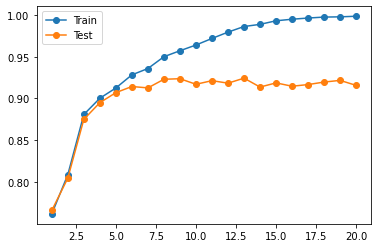

In [7]:
import matplotlib.pyplot as plt
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

This analysis is interesting. It shows why the model has a worse hold-out test set performance when “max_depth” is set to large values

However, in the next section, we will show where this analysis can be misleading.

Sometimes, we may perform an analysis of machine learning model behavior and be deceived by the results.

A good example of this is varying the number of neighbors for the k-nearest neighbors algorithms, which we can implement using the [sklearn.neighbors.KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class and configure via the “n_neighbors” argument.

>1, train: 1.000, test: 0.910
>2, train: 0.965, test: 0.909
>3, train: 0.966, test: 0.921
>4, train: 0.960, test: 0.920
>5, train: 0.956, test: 0.925
>6, train: 0.954, test: 0.927
>7, train: 0.952, test: 0.926
>8, train: 0.952, test: 0.925
>9, train: 0.951, test: 0.925
>10, train: 0.951, test: 0.925
>11, train: 0.948, test: 0.925
>12, train: 0.949, test: 0.922
>13, train: 0.947, test: 0.924
>14, train: 0.947, test: 0.922
>15, train: 0.947, test: 0.922
>16, train: 0.946, test: 0.923
>17, train: 0.946, test: 0.921
>18, train: 0.946, test: 0.923
>19, train: 0.946, test: 0.922
>20, train: 0.947, test: 0.921
>21, train: 0.946, test: 0.921
>22, train: 0.946, test: 0.922
>23, train: 0.945, test: 0.920
>24, train: 0.945, test: 0.921
>25, train: 0.944, test: 0.920
>26, train: 0.944, test: 0.921
>27, train: 0.943, test: 0.921
>28, train: 0.943, test: 0.920
>29, train: 0.942, test: 0.920
>30, train: 0.942, test: 0.920
>31, train: 0.940, test: 0.920
>32, train: 0.943, test: 0.921
>33, train: 0.941

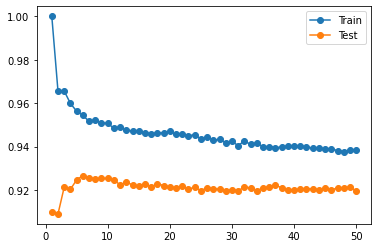

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = KNeighborsClassifier(n_neighbors=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Recall, we are looking for a pattern where performance on the test set improves and then starts to get worse, and performance on the training set continues to improve.

We do not see this pattern.

Instead, we see that accuracy on the training dataset starts at perfect accuracy and falls with almost every increase in the number of neighbors.

We also see that performance of the model on the holdout test improves to a value of about five neighbors, holds level and begins a downward trend after that.

The plots make the situation clearer. It looks as though the line plot for the training set is dropping to converge with the line for the test set. Indeed, this is exactly what is happening.

### Separate Overfitting Analysis From Model Selection

Overfitting should not be confused with model selection.

We choose a predictive model or model configuration based on its out-of-sample performance. That is, its performance on new data not seen during training.

The reason we do this is that in predictive modeling, we are primarily interested in a model that makes skillful predictions. We want the model that can make the best possible predictions given the time and computational resources we have available.

This might mean we choose a model that looks like it has overfit the training dataset. In which case, an overfit analysis might be misleading.

It might also mean that the model has poor or terrible performance on the training dataset.

In general, if we cared about model performance on the training dataset in model selection, then we would expect a model to have perfect performance on the training dataset. It’s data we have available; we should not tolerate anything less.